In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
Считать данные с помощью pandas
Вывести на экран первые 5 строк
1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib
1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib
1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [4]:
df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib

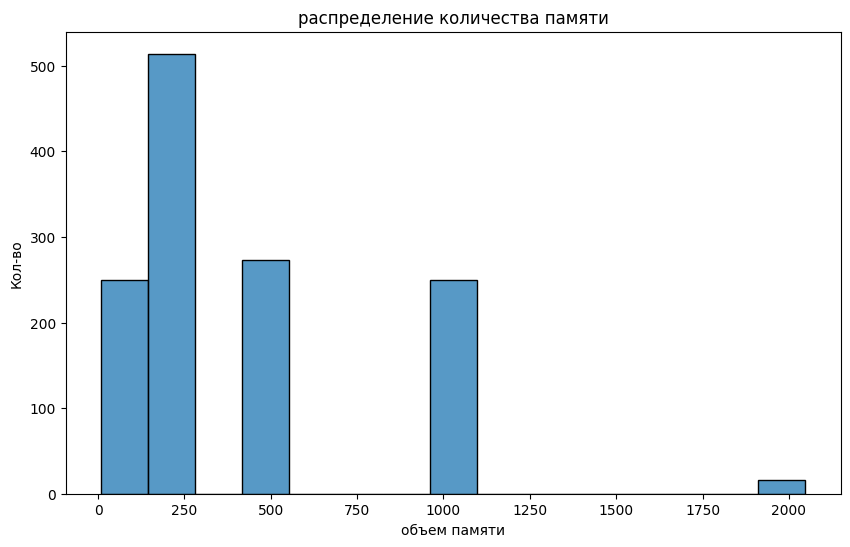

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Memory_Amount'], bins=15);
plt.title('распределение количества памяти')
plt.xlabel('объем памяти')
plt.ylabel('Кол-во');

1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib

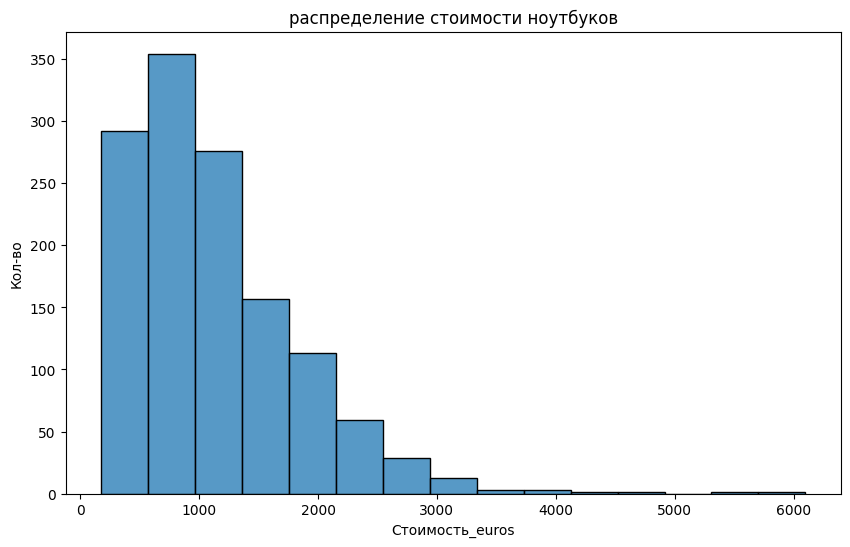

In [141]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], bins=15);
plt.title('распределение стоимости ноутбуков')
plt.xlabel('Стоимость_euros')
plt.ylabel('Кол-во');

1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib

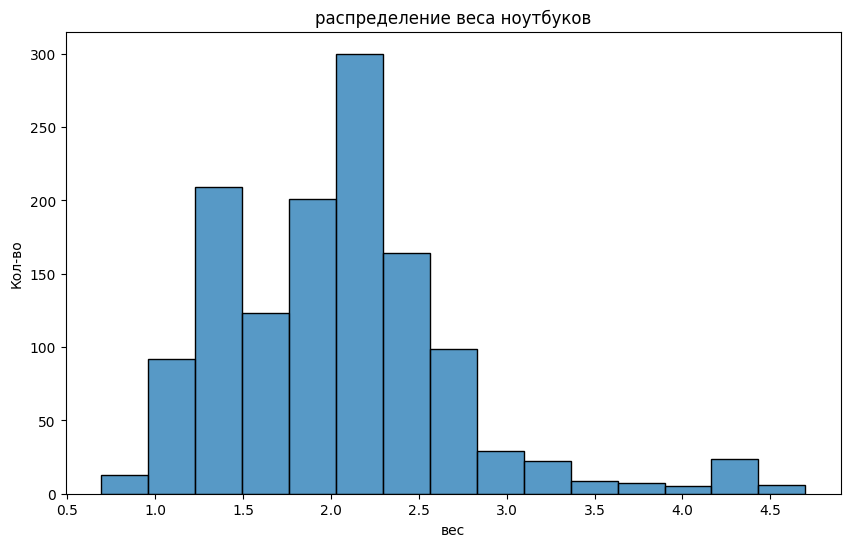

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], bins=15);
plt.title('распределение веса ноутбуков')
plt.xlabel('вес')
plt.ylabel('Кол-во');

2.1 Изучите распределение типов носителя (Memory_Type)
2.2 Изучите распределение компаний производителей (Company)
2.3 Изучите распределение операционной системы (OpSys)
2.4 Изучите распределение компаний производителей CPU (Cpu_Company)

Постройте график
Сделайте выводы

In [49]:
data = df['Memory_Type'].value_counts()
data.head()


SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

Text(0.5, 1.0, 'распределение типов носителя')

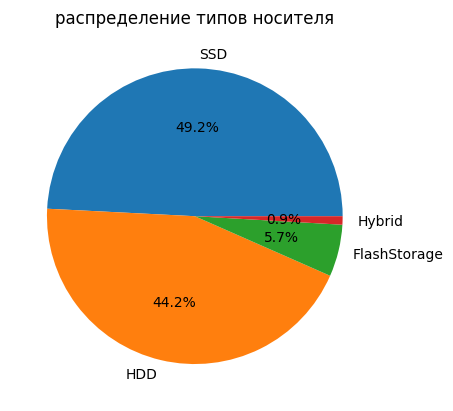

In [48]:
#plt.figure(figsize=(4, 6))
#sns.histplot(df['Memory_Type'], bins=15);
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('распределение типов носителя')

2.2 Изучите распределение компаний производителей (Company)

In [68]:
data2 = df['Company'].value_counts()
data2.head()

Dell      297
Lenovo    297
HP        274
Asus      158
Acer      103
Name: Company, dtype: int64

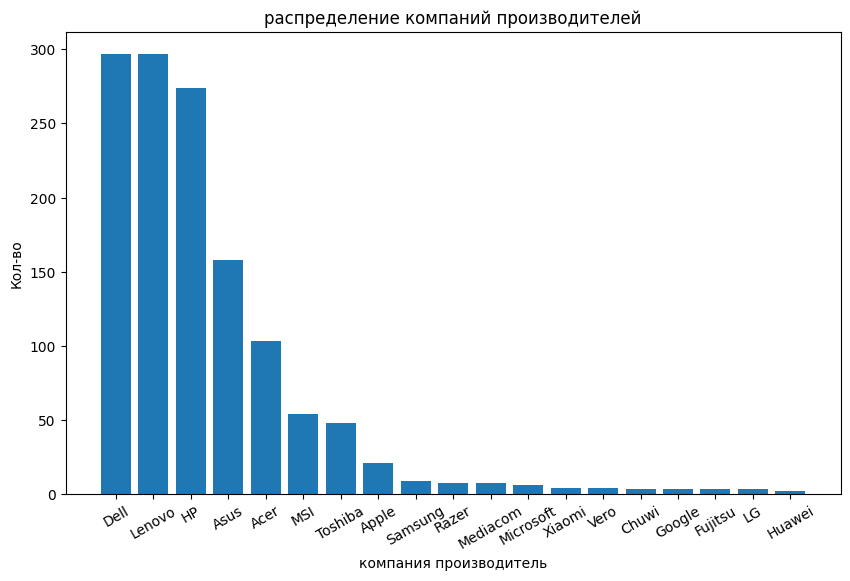

In [70]:
plt.figure(figsize=(10, 6))
plt.bar(data2.index, data2)
plt.title('распределение компаний производителей')
plt.xlabel('компания производитель')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

2.3 Изучите распределение операционной системы (OpSys)

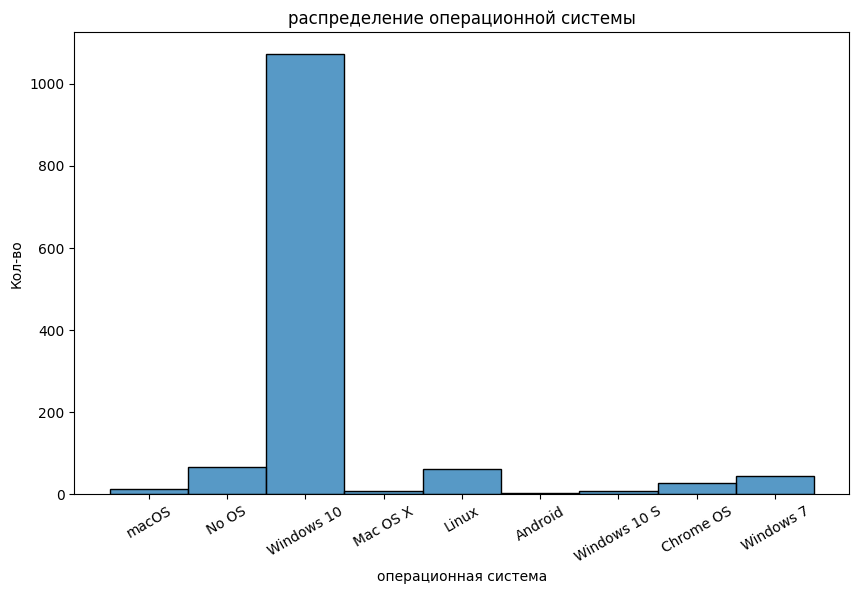

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['OpSys'], bins=15);
plt.title('распределение операционной системы')
plt.xlabel('операционная система')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

2.4 Изучите распределение компаний производителей CPU (Cpu_Company)

In [71]:
data3 = df['Cpu_Company'].value_counts()
data3

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

Text(0.5, 1.0, 'распределение компаний производителей')

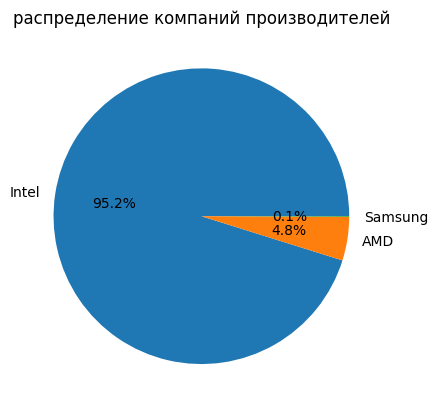

In [73]:
#plt.figure(figsize=(6, 6))
#sns.histplot(df['Cpu_Company'], bins=15);
plt.pie(data3, autopct='%1.1f%%', labels=data3.index)
plt.title('распределение компаний производителей')

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах
3.2 Постройте график в относительных величинах

In [91]:
data4 = pd.crosstab(index = df['Company'], columns = df['Cpu_Company']).reset_index()
data4.drop(columns=['Samsung'], inplace=True)
data4

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


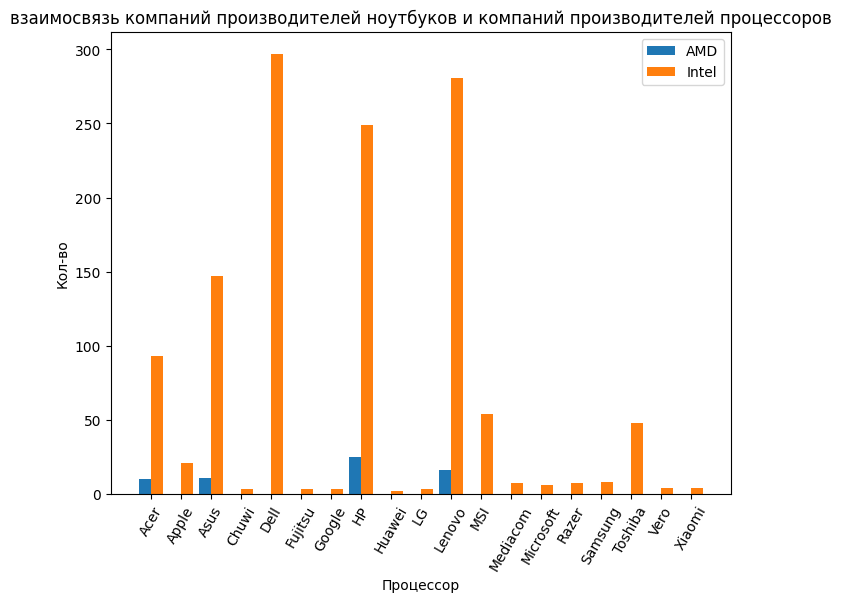

In [98]:
plt.figure(figsize=(8, 6))
n_ticks = np.arange(len(data4['Company']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data4['AMD'], width=w)
plt.bar(n_ticks + offset, data4['Intel'], width=w)
plt.title('взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Процессор')
plt.ylabel('Кол-во')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data4['Company'], rotation = 60);

3.2 Постройте график в относительных величинах

In [114]:
data5 = pd.crosstab(index = df['Company'], columns = df['Cpu_Company'], normalize='index').reset_index()
data5.drop(columns=['Samsung'], inplace=True)
data5

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


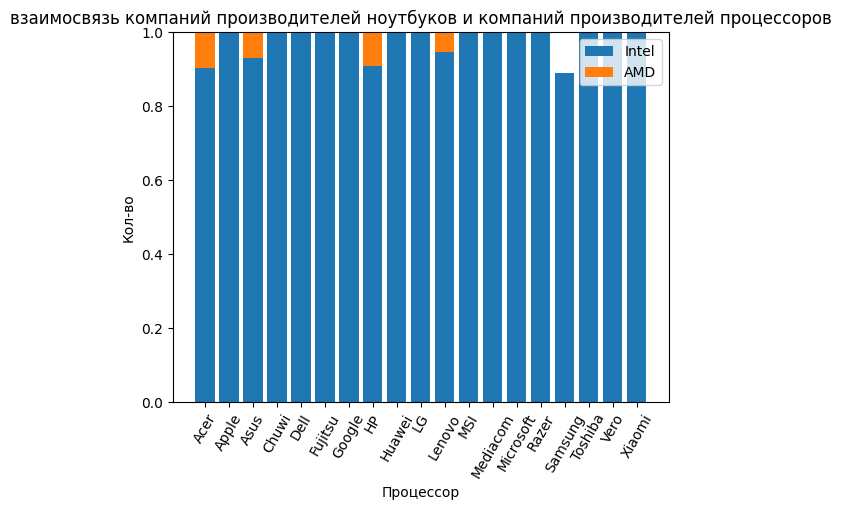

In [118]:
#plt.figure(figsize=(8, 6))
plt.bar(data5['Company'], data5['Intel'])
plt.bar(data5['Company'], data5['AMD'], bottom=data5['Intel'])
plt.title('взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Процессор')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(data5['Company'], rotation = 60);

4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти
4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [120]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


<AxesSubplot: xlabel='Price_euros', ylabel='Cpu_Company'>

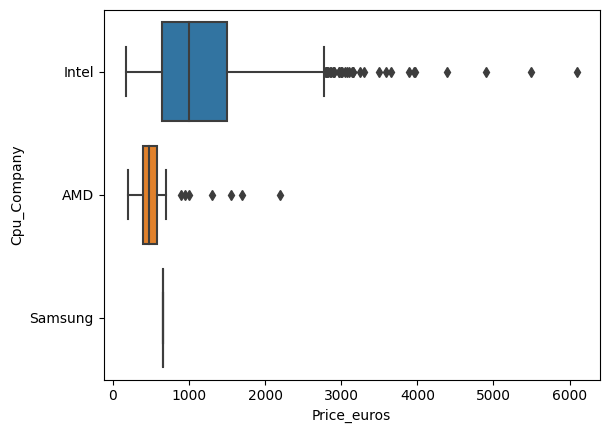

In [135]:
#sns.scatterplot(x=df['Price_euros'], y=df['Cpu_Company']);
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'])



# plt.title('Время последнего контакта')
# plt.xlabel('Совершили покупку')

# plt.ylabel('Время в секундах')
# plt.xticks([0, 1], ['yes', 'no']);

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

<AxesSubplot: xlabel='Price_euros', ylabel='Memory_Type'>

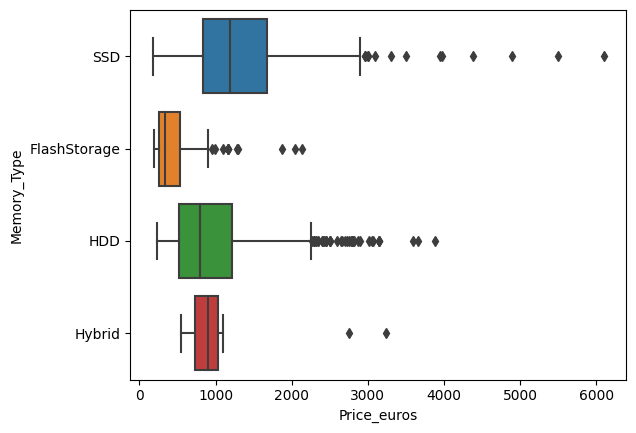

In [136]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'])

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

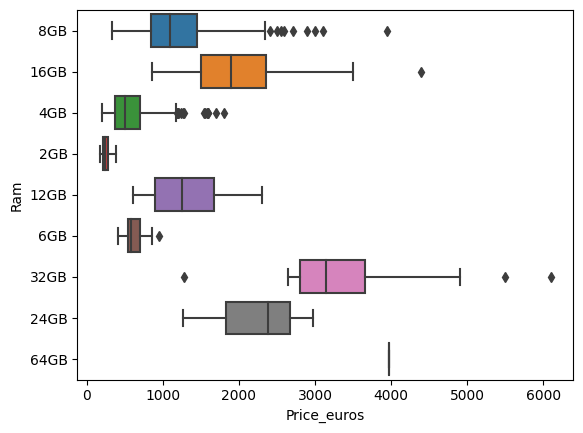

In [138]:
sns.boxplot(x=df['Price_euros'], y=df['Ram']);

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

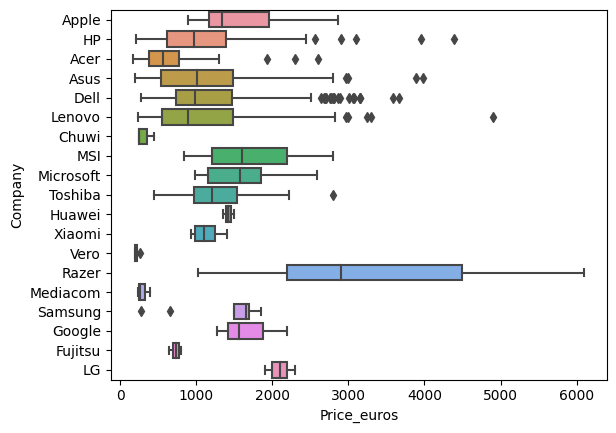

In [145]:
sns.boxplot(x=df['Price_euros'], y=df['Company']);
#plt.xticks(df['Company'], rotation = 60)

Постройте матрицу корреляций для таблицы

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\3400066399.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


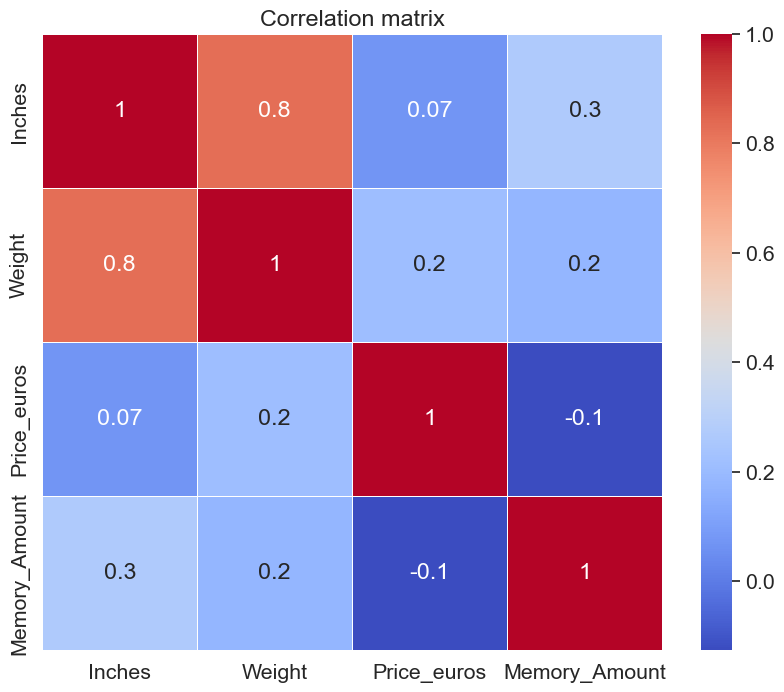

In [160]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm',fmt = '.1g')

plt.title('Correlation matrix');

In [154]:
corr_matrix.round()

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,1.0,0.0,0.0
Weight,1.0,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,-0.0
Memory_Amount,0.0,0.0,-0.0,1.0
